In [7]:
cv_key = 'a54fb90f6abb4c198edc84b5c7778c84'
cv_url = "centralindia.cognitiveservices.azure.com"
image_url = 'https://www.armyupress.army.mil/portals/7/nco-journal/images/170926-A-VI272-928.jpg'

{'description': {'tags': ['grass', 'person', 'military', 'outdoor', 'field', 'man', 'uniform', 'standing', 'group', 'couple', 'baseball', 'cake', 'wearing', 'people', 'carrying', 'grassy', 'holding', 'white', 'cutting', 'player', 'slope', 'hill', 'sheep', 'ball', 'cut'], 'captions': [{'text': 'a group of people wearing military uniforms', 'confidence': 0.9167560713489377}]}, 'requestId': 'defd15db-b68e-4162-9ac8-6b3bf7dcc449', 'metadata': {'width': 1638, 'height': 1800, 'format': 'Jpeg'}}


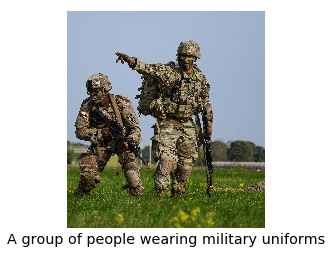

In [8]:
import urllib.parse, http.client
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests, json

headers = {
    'Ocp-Apim-Subscription-Key':cv_key
}

body = {
    'url':image_url
}

params = urllib.parse.urlencode({
    'visualFeatures':'Description'
})

try:
    cv_conn = http.client.HTTPSConnection(cv_url)
    cv_conn.request("POST", "/vision/v3.0/analyze?%s" % params, str(body), headers)
    cv_response = cv_conn.getresponse()
    cv_data = json.loads(cv_response.read())
    print(cv_data)
    
    cv_caption = cv_data["description"]["captions"][0]["text"].capitalize()
    image = Image.open(BytesIO(requests.get(image_url).content))
    plt.imshow(image)
    plt.axis("off")
    plt.title(cv_caption, size="x-large", y=-0.1)
    plt.show()
    cv_conn.close()
except Expception as ex:
    print(ex)